# Data Cleansing

- [Data Understanding](#Data-Understanding)
    * Reading in and Exploring Data
    * Dealing with Column Names
    * Slicing Dataset
- [Cleaning and Exploring Columns](#Cleaning-and-Exploring-Columns)
    * [Safety & Security](#Safety-&-Security)
    * [Model](#Model)
    * [Make](#Make)
    * [Model2](#Model2)
    * [Model Code](#Model-Code)
    * [Country Version](#Country-Version)
    * [CO2 Emission](#CO2-Emission)
    
    * [Consumption](#Consumption)
    * [Cylinders](#Cylinders)
    * [Displacement](#Displacement)
    * [Next Inspection](#Next-Inspection)
    * [Non-smoking Vehicle](#Non-smoking-Vehicle)
    * [Body Type](#Body-Type)
    * [Hp](#Hp)
    * [Kw](#Kw)
    * [Km](#Km)
    * [Offer Number](#Offer-Number)
    * [Description](#Description)
    ---
    _Additional Columns for Further Investigation_
    * [Price](#Price)
    * [Registration](#Registration)

## Data Understanding

In [1]:
# Import necessay modules
import json
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# Display 100 columns max
pd.set_option('display.max_columns', 100)

In [2]:
# Initiate directory paths
data_folder = '/Users/stb/Documents/Github/fraud-detection/data/'

### Reading in and Exploring Data

In [3]:
ads_list = []
with open(data_folder + 'autos_20190626.json','r') as file:
    for ad in file:
        ad_obj = json.loads(ad)
        ads_list.append(ad_obj)
autos = pd.DataFrame(ads_list)

In [11]:
autos.head(3)

,comfort_convenience,entertainment_media,extras,safety_security,availability,available_from,body,body_color,body_color_original,co2_emission,consumption,country_version,cylinders,displacement,drive_chain,electricity_consumption,emission_class,emission_label,first_registration,fuel,full_service,gearing_type,gears,inspection_new,last_service_date,last_timing_belt_service_date,make,model,model_code,next_inspection,non_smoking_vehicle,nr_of_doors,nr_of_seats,offer_number,other_fuel_types,paint_type,previous_owners,type,upholstery,warranty,weight,body_type,description,hp,kw,km,make_model,null,prev_owner,price,registration,short_description,url,vat
0,"[Air conditioning, Armrest, Automatic climate ...","[Bluetooth, Hands-free equipment, On-board com...","[Alloy wheels, Catalytic Converter, Voice Cont...","[ABS, Central door lock, Daytime running light...",NaN,NaN,"[\n, Sedans, \n]","[\n, Black, \n]",[\nMythosschwarz\n],[\n99 g CO2/km (comb)\n],"[[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...",NaN,[\n3\n],"[\n1,422 cc\n]",[\nfront\n],NaN,[\nEuro 6\n],NaN,"[\n, 2016, \n]","[\n, Diesel (Particulate Filter), \n]","[\n, \n]","[\n, Automatic, \n]",NaN,"[\nYes\n, \nEuro 6\n]",NaN,NaN,\nAudi\n,"[\n, A1, \n]",[\n0588/BDF\n],"[\n06/2021\n, \n99 g CO2/km (comb)\n]","[\n, \n]",[\n5\n],[\n5\n],[\nLR-062483\n],NaN,[\nMetallic\n],\n2\n,"[, Used, , Diesel (Particulate Filter)]","[\nCloth, Black\n]","[\n, \n, \n4 (Green)\n]","[\n1,220 kg\n]",Sedans,"[\n, Sicherheit:, , Deaktivierung für Beifahr...",66 kW,None,"56,013 km",Audi A1,[],2 previous owners,15770,01/2016,Sportback 1.4 TDI S-tronic Xenon Navi Klima,https://www.autoscout24.com//offers/audi-a1-sp...,VAT deductible
1,"[Air conditioning, Automatic climate control, ...","[Bluetooth, Hands-free equipment, On-board com...","[Alloy wheels, Sport seats, Sport suspension, ...","[ABS, Central door lock, Central door lock wit...",NaN,NaN,"[\n, Sedans, \n]","[\n, Red, \n]",NaN,[\n129 g CO2/km (comb)\n],"[[5.6 l/100 km (comb)], [7.1 l/100 km (city)],...",NaN,[\n4\n],"[\n1,798 cc\n]",[\nfront\n],NaN,[\nEuro 6\n],[\n4 (Green)\n],"[\n, 2017, \n]","[\n, Gasoline, \n]",NaN,"[\n, Automatic, \n]",[\n7\n],NaN,NaN,NaN,\nAudi\n,"[\n, A1, \n]",[\n0588/BCY\n],NaN,NaN,[\n3\n],[\n4\n],NaN,NaN,NaN,NaN,"[, Used, , Gasoline]","[\nCloth, Grey\n]",NaN,"[\n1,255 kg\n]",Sedans,[\nLangstreckenfahrzeug daher die hohe Kilomet...,141 kW,None,"80,000 km",Audi A1,[],None,14500,03/2017,1.8 TFSI sport,https://www.autoscout24.com//offers/audi-a1-1-...,Price negotiable
2,"[Air conditioning, Cruise control, Electrical ...","[MP3, On-board computer]","[Alloy wheels, Voice Control]","[ABS, Central door lock, Daytime running light...",NaN,NaN,"[\n, Sedans, \n]","[\n, Black, \n]",[\nmythosschwarz metallic\n],[\n99 g CO2/km (comb)\n],"[[3.8 l/100 km (comb)], [4.4 l/100 km (city)],...",NaN,NaN,"[\n1,598 cc\n]",[\nfront\n],NaN,[\nEuro 6\n],[\n4 (Green)\n],"[\n, 2016, \n]","[\n, Diesel (Particulate Filter), \n]",NaN,"[\n, Automatic, \n]",NaN,NaN,NaN,NaN,\nAudi\n,"[\n, A1, \n]",NaN,NaN,NaN,[\n4\n],[\n4\n],[\nAM-95365\n],NaN,[\nMetallic\n],\n1\n,"[, Used, , Diesel (Particulate Filter)]","[\nCloth, Black\n]","[\n, \n, \n99 g CO2/km (comb)\n]",NaN,Sedans,"[\n, Fahrzeug-Nummer: AM-95365, , Ehem. UPE 2...",85 kW,None,"83,450 km",Audi A1,[],1 previous owner,14640,02/2016,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...,https://www.autoscout24.com//offers/audi-a1-sp...,VAT deductible


In [12]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 54 columns):
comfort_convenience              14999 non-null object
entertainment_media              14545 non-null object
extras                           12957 non-null object
safety_security                  14937 non-null object
availability                     635 non-null object
available_from                   272 non-null object
body                             15859 non-null object
body_color                       15322 non-null object
body_color_original              12160 non-null object
co2_emission                     14111 non-null object
consumption                      14013 non-null object
country_version                  7586 non-null object
cylinders                        10239 non-null object
displacement                     15423 non-null object
drive_chain                      9061 non-null object
electricity_consumption          137 non-null object
emission_class     

### Dealing with Column Names

In [13]:
autos.columns

Index(['comfort_convenience', 'entertainment_media', 'extras',
       'safety_security', 'availability', 'available_from', 'body',
       'body_color', 'body_color_original', 'co2_emission', 'consumption',
       'country_version', 'cylinders', 'displacement', 'drive_chain',
       'electricity_consumption', 'emission_class', 'emission_label',
       'first_registration', 'fuel', 'full_service', 'gearing_type', 'gears',
       'inspection_new', 'last_service_date', 'last_timing_belt_service_date',
       'make', 'model', 'model_code', 'next_inspection', 'non_smoking_vehicle',
       'nr_of_doors', 'nr_of_seats', 'offer_number', 'other_fuel_types',
       'paint_type', 'previous_owners', 'type', 'upholstery', 'warranty',
       'weight', 'body_type', 'description', 'hp', 'kw', 'km', 'make_model',
       'null', 'prev_owner', 'price', 'registration', 'short_description',
       'url', 'vat'],
      dtype='object')

In [14]:
# Run "name_columns" function to name the columns in our convention
%run -i "/Users/stb/Documents/Github/fraud-detection/functions/name_columns.py"

Alternatively, we can load the file into the cell with the `%load` magic command. (`%load?` for more info)

In [15]:
# %load "/Users/stb/Documents/Github/fraud-detection/functions/name_columns.py"

In [16]:
autos.columns = name_columns(autos)
autos.columns

Index(['comfort_convenience', 'entertainment_media', 'extras',
       'safety_security', 'availability', 'available_from', 'body',
       'body_color', 'body_color_original', 'co2_emission', 'consumption',
       'country_version', 'cylinders', 'displacement', 'drive_chain',
       'electricity_consumption', 'emission_class', 'emission_label',
       'first_registration', 'fuel', 'full_service', 'gearing_type', 'gears',
       'inspection_new', 'last_service_date', 'last_timing_belt_service_date',
       'make', 'model', 'model_code', 'next_inspection', 'non_smoking_vehicle',
       'nr_of_doors', 'nr_of_seats', 'offer_number', 'other_fuel_types',
       'paint_type', 'previous_owners', 'type', 'upholstery', 'warranty',
       'weight', 'body_type', 'description', 'hp', 'kw', 'km', 'make_model',
       'null', 'prev_owner', 'price', 'registration', 'short_description',
       'url', 'vat'],
      dtype='object')

### Slicing Dataset

In [288]:
t_cols = ['safety_security', 'co2_emission', 'consumption', 'country_version', 
          'cylinders', 'displacement', 'make', 'model', 'model_code', 'next_inspection',
          'non_smoking_vehicle', 'body_type', 'description', "hp", 'kw', 'km', "make_model", "offer_number"]

In [18]:
df = autos[t_cols]

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 18 columns):
safety_security        14937 non-null object
co2_emission           14111 non-null object
consumption            14013 non-null object
country_version        7586 non-null object
cylinders              10239 non-null object
displacement           15423 non-null object
make                   15919 non-null object
model                  15919 non-null object
model_code             4978 non-null object
next_inspection        3535 non-null object
non_smoking_vehicle    7177 non-null object
body_type              15859 non-null object
description            15919 non-null object
hp                     15919 non-null object
kw                     0 non-null object
km                     15919 non-null object
make_model             15919 non-null object
offer_number           12744 non-null object
dtypes: object(18)
memory usage: 2.2+ MB


## Cleaning and Exploring Columns

### Safety & Security

In [20]:
# Number of missing values (NaNs) of a column
# print(df['safety_security'].isnull().sum())

# Change the type of NaNs from float to (empty) list
# df['safety&security'][df['safety&security'].isnull()].apply(lambda x: [])

982


In [38]:
# def NaN_to_list(data, column_name):
#     '''
#     When dealing with a column which consist of lists, we need to change
#     the type of NaNs from 'float' to 'list' in order to perform iterative 
#     operations. This function detects NaNs and creates an empty list for
#     missing rows.
#     '''
#     # Create a boolean vector for indexing
#     NaN_rows = data[column_name].isnull()
    
#     # Change the type of NaNs from 'float' to (empty) 'list'
#     data.loc[NaN_rows, column_name] = data.loc[NaN_rows, column_name].apply(lambda x: [])

In [17]:
# NaN_to_list(df, 'safety_security')

In [18]:
# Check to see if there are remaining NaNs
# df['safety_security'].isnull().sum()

In [41]:
# def get_uniques(data, column_name):
#     '''
#     Get the unique elements from a column
#     which consists of list of items.
#     '''
#     unique_vals = set()
    
#     for row in data[column_name]:
#         # Add list of items to a set
#         unique_vals.update(row)

#     return unique_vals

In [42]:
# uniques = get_uniques(df, 'safety_security')

In [19]:
# len(uniques), uniques

In [21]:
# # Create dummies using the items in the list of 'safety_security' column
# df['safety_security'].str.join('|').str.get_dummies().add_prefix('ss_').head()
# # split(",", expand=True) #hepsini ayri sutun

,ss_ABS,ss_Adaptive Cruise Control,ss_Adaptive headlights,ss_Alarm system,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights
0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1
1,1,0,0,0,0,1,1,1,0,1,1,0,0,0,1,1,1,0,0,0,0,1,1,0,1,1,1,0,1
2,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,1,0,0
3,1,0,0,1,0,0,1,0,1,1,1,0,1,0,1,1,1,0,0,0,0,1,1,0,1,1,0,0,0
4,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1


In [26]:
# Create dummies using the items in the list of 'safety&security' column
df_new = df.join(df['safety_security'].str.join('|').str.get_dummies().add_prefix('ss_'))

# Print the head of the new DataFrame
# df_new.head(3)

,safety_security,co2_emission,consumption,country_version,cylinders,displacement,make,model,model_code,next_inspection,non_smoking_vehicle,body_type,description,hp,kw,km,make_model,offer_number,ABS,Adaptive Cruise Control,Adaptive headlights,Alarm system,Blind spot monitor,Central door lock,Central door lock with remote control,Daytime running lights,Driver drowsiness detection,Driver-side airbag,Electronic stability control,Emergency brake assistant,Emergency system,Fog lights,Head airbag,Immobilizer,Isofix,LED Daytime Running Lights,LED Headlights,Lane departure warning system,Night view assist,Passenger-side airbag,Power steering,Rear airbag,Side airbag,Tire pressure monitoring system,Traction control,Traffic sign recognition,Xenon headlights
0,"[ABS, Central door lock, Daytime running light...",[\n99 g CO2/km (comb)\n],"[[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...",NaN,[\n3\n],"[\n1,422 cc\n]",\nAudi\n,"[\n, A1, \n]",[\n0588/BDF\n],"[\n06/2021\n, \n99 g CO2/km (comb)\n]","[\n, \n]",Sedans,"[\n, Sicherheit:, , Deaktivierung für Beifahr...",66 kW,None,"56,013 km",Audi A1,[\nLR-062483\n],1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1
1,"[ABS, Central door lock, Central door lock wit...",[\n129 g CO2/km (comb)\n],"[[5.6 l/100 km (comb)], [7.1 l/100 km (city)],...",NaN,[\n4\n],"[\n1,798 cc\n]",\nAudi\n,"[\n, A1, \n]",[\n0588/BCY\n],NaN,NaN,Sedans,[\nLangstreckenfahrzeug daher die hohe Kilomet...,141 kW,None,"80,000 km",Audi A1,NaN,1,0,0,0,0,1,1,1,0,1,1,0,0,0,1,1,1,0,0,0,0,1,1,0,1,1,1,0,1
2,"[ABS, Central door lock, Daytime running light...",[\n99 g CO2/km (comb)\n],"[[3.8 l/100 km (comb)], [4.4 l/100 km (city)],...",NaN,NaN,"[\n1,598 cc\n]",\nAudi\n,"[\n, A1, \n]",NaN,NaN,NaN,Sedans,"[\n, Fahrzeug-Nummer: AM-95365, , Ehem. UPE 2...",85 kW,None,"83,450 km",Audi A1,[\nAM-95365\n],1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,1,0,0


In [27]:
# df_new.loc[:, 'ABS':"Xenon headlights"].describe()

,ABS,Adaptive Cruise Control,Adaptive headlights,Alarm system,Blind spot monitor,Central door lock,Central door lock with remote control,Daytime running lights,Driver drowsiness detection,Driver-side airbag,Electronic stability control,Emergency brake assistant,Emergency system,Fog lights,Head airbag,Immobilizer,Isofix,LED Daytime Running Lights,LED Headlights,Lane departure warning system,Night view assist,Passenger-side airbag,Power steering,Rear airbag,Side airbag,Tire pressure monitoring system,Traction control,Traffic sign recognition,Xenon headlights
count,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000
mean,0.887619,0.081852,0.128212,0.120736,0.081098,0.798229,0.150575,0.654061,0.031786,0.873296,0.828381,0.197940,0.099001,0.515862,0.137320,0.659526,0.737735,0.345876,0.192537,0.191846,0.004711,0.843960,0.854262,0.054400,0.829386,0.666122,0.691249,0.124128,0.222313
std,0.315845,0.274148,0.334336,0.325831,0.272994,0.401335,0.357645,0.475688,0.175435,0.332651,0.377061,0.398459,0.298673,0.499764,0.344196,0.473883,0.439880,0.475668,0.394305,0.393765,0.068480,0.362905,0.352854,0.226813,0.376183,0.471611,0.461992,0.329738,0.415813
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Model

In [28]:
# df.model.sample(10)

6020      [\n, Astra, \n]
14621      [\n, Clio, \n]
1651         [\n, A1, \n]
4593         [\n, A3, \n]
4966         [\n, A3, \n]
13667      [\n, Clio, \n]
14063      [\n, Clio, \n]
15193    [\n, Espace, \n]
8194      [\n, Astra, \n]
9890      [\n, Corsa, \n]
Name: model, dtype: object

In [29]:
# Count the number of missing values
# df.model.isnull().sum()

0

In [30]:
# Clean the model column
df_new['model'] = df.model.apply(lambda x: x[1])

In [31]:
# Compare auto models and new columns
# df_new.groupby('model').sum()

,ABS,Adaptive Cruise Control,Adaptive headlights,Alarm system,Blind spot monitor,Central door lock,Central door lock with remote control,Daytime running lights,Driver drowsiness detection,Driver-side airbag,Electronic stability control,Emergency brake assistant,Emergency system,Fog lights,Head airbag,Immobilizer,Isofix,LED Daytime Running Lights,LED Headlights,Lane departure warning system,Night view assist,Passenger-side airbag,Power steering,Rear airbag,Side airbag,Tire pressure monitoring system,Traction control,Traffic sign recognition,Xenon headlights
model,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A1,2242,56,128,287,11,2114,408,1935,70,2287,2319,416,308,1380,418,2088,1804,387,374,445,4,2296,2350,96,2320,1764,1857,38,741
A2,1,1,0,0,0,1,0,1,0,1,1,1,0,0,0,1,1,0,0,1,0,1,1,0,1,1,1,0,0
A3,2873,434,321,728,41,2490,597,1522,281,2778,2447,237,119,1075,563,2065,2155,798,497,170,16,2543,2839,248,2509,1800,2178,61,2051
Astra,2189,148,248,213,160,2134,321,1881,38,2254,2167,695,320,1639,282,1779,2068,1269,315,751,6,2191,2166,115,2125,1870,1801,609,98
Clio,1682,22,117,179,3,1464,244,1049,3,1581,1457,141,40,966,116,975,1242,818,338,4,5,1508,1448,69,1490,1109,965,7,24
Corsa,1988,22,74,161,19,1843,373,1582,2,1950,1840,94,90,1120,304,1249,1776,444,31,29,1,1885,1933,73,1860,1549,1501,20,55
Duster,34,0,0,0,0,2,0,0,0,34,1,0,0,16,0,0,2,0,0,0,0,2,34,0,0,0,1,0,0
Espace,872,201,122,126,446,586,123,584,49,818,764,412,37,248,154,473,669,436,537,394,29,801,730,95,786,622,641,458,64
Insignia,2249,419,1031,228,611,2073,331,1858,63,2199,2191,1155,662,1768,349,1869,2027,1354,973,1260,14,2208,2098,170,2112,1889,2059,783,506


In [34]:
# Distribution of car models
# df_new.model.value_counts()

A3          3097
A1          2614
Insignia    2598
Astra       2526
Corsa       2219
Clio        1839
Espace       991
Duster        34
A2             1
Name: model, dtype: int64

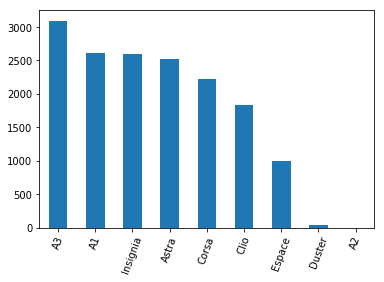

In [35]:
# df_new.model.value_counts().plot.bar(rot=70)

### Make

In [36]:
# df.make.sample(10)

10054       \nOpel\n
14135    \nRenault\n
3400        \nAudi\n
2278        \nAudi\n
5420        \nAudi\n
10544       \nOpel\n
6827        \nOpel\n
3312        \nAudi\n
9959        \nOpel\n
7409        \nOpel\n
Name: make, dtype: object

In [37]:
# Number of missing values in this column
# df.make.isnull().sum()

0

In [48]:
# Strip "\n"s from the 'make' column
df_new['make'] = df.make.str.strip("\n")

In [49]:
# df_new['make'].sample(10)

12880       Opel
12796       Opel
12534       Opel
14197    Renault
9411        Opel
5011        Audi
7321        Opel
1852        Audi
15039    Renault
5873        Opel
Name: make, dtype: object

In [50]:
# df_new.make.value_counts()

Opel       7343
Audi       5712
Renault    2864
Name: make, dtype: int64

In [51]:
# df_new.groupby(["make", "model"]).size()

make     model   
Audi     A1          2614
         A2             1
         A3          3097
Opel     Astra       2526
         Corsa       2219
         Insignia    2598
Renault  Clio        1839
         Duster        34
         Espace       991
dtype: int64

In [52]:
# df_new.groupby(["make", "model"]).mean()

ABS  Adaptive Cruise Control  Adaptive headlights  \
make    model                                                              
Audi    A1        0.857689                 0.021423             0.048967   
        A2        1.000000                 1.000000             0.000000   
        A3        0.927672                 0.140136             0.103649   
Opel    Astra     0.866587                 0.058591             0.098179   
        Corsa     0.895899                 0.009914             0.033348   
        Insignia  0.865666                 0.161278             0.396844   
Renault Clio      0.914628                 0.011963             0.063622   
        Duster    1.000000                 0.000000             0.000000   
        Espace    0.879919                 0.202825             0.123108   

                  Alarm system  Blind spot monitor  Central door lock  \
make    model                                                           
Audi    A1            0.109793            0.004208           0.808722   
        A2            0.000000            0.000000           1.000000   
        A3            0.235066            0.013239           0.804004   
Opel    Astra         0.084323            0.063341           0.844814   
        Corsa         0.072555            0.008562           0.830554   
        Insignia      0.087760            0.235181           0.797921   
Renault Clio          0.097336            0.001631           0.796085   
        Duster        0.000000            0.000000           0.058824   
        Espace        0.127144            0.450050           0.591322   

                  Central door lock with remote control  \
make    model                                             
Audi    A1                                     0.156083   
        A2                                     0.000000   
        A3                                     0.192767   
Opel    Astra                                  0.127078   
        Corsa                                  0.168094   
        Insignia                               0.127406   
Renault Clio                                   0.132681   
        Duster                                 0.000000   
        Espace                                 0.124117   

                  Daytime running lights  Driver drowsiness detection  \
make    model                                                           
Audi    A1                      0.740245                     0.026779   
        A2                      1.000000                     0.000000   
        A3                      0.491443                     0.090733   
Opel    Astra                   0.744656                     0.015044   
        Corsa                   0.712934                     0.000901   
        Insignia                0.715166                     0.024249   
Renault Clio                    0.570419                     0.001631   
        Duster                  0.000000                     0.000000   
        Espace                  0.589304                     0.049445   

                  Driver-side airbag  Electronic stability control  \
make    model                                                        
Audi    A1                  0.874904                      0.887146   
        A2                  1.000000                      1.000000   
        A3                  0.896997                      0.790119   
Opel    Astra               0.892320                      0.857878   
        Corsa               0.878774                      0.829202   
        Insignia            0.846420                      0.843341   
Renault Clio                0.859706                      0.792278   
        Duster              1.000000                      0.029412   
        Espace              0.825429                      0.770938   

                  Emergency brake assistant  Emergency system  Fog lights  \
make    model                                                               
Aud

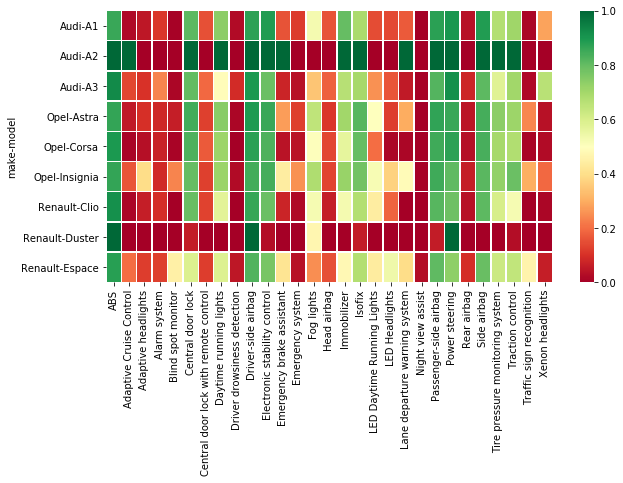

In [53]:
# # Add figure size
# plt.figure(figsize=(10,5))

# # Plot heatmap of the table above
# sns.heatmap(df_new.groupby(["make", "model"]).mean(), 
#             linewidths=.5, cmap="RdYlGn")

Initial findings:
- Renault Duster has almost no extras. Interestingly however, all Dusters have ABS, Driver-side airbag and Power steering. The reason might be that Duster is a relatively new model of Renault, and that all the cars have ABS etc. (It is possible that Old Merivas, for example, might not have ABS)
- Almost none of the cars have Blind spot monitor, Emergency System, Night view Assist and Traffic Sign Recognition. This is normal since only luxury segment cars (high end models) have such characteristics.
- Only Audis have Xenon headlights (or high proportion of Audis)
- It is hard to make inference using this graph, since it shows only a portion of car "makes" and "models".
- ...

### Model2

In [55]:
# df.make_model.head()

0    Audi A1
1    Audi A1
2    Audi A1
3    Audi A1
4    Audi A1
Name: make_model, dtype: object

In [57]:
# df.make_model.value_counts()

Audi A3           3097
Audi A1           2614
Opel Insignia     2598
Opel Astra        2526
Opel Corsa        2219
Renault Clio      1839
Renault Espace     991
Renault Duster      34
Audi A2              1
Name: make_model, dtype: int64

In [58]:
# df_new.groupby('make').model.value_counts()

make     model   
Audi     A3          3097
         A1          2614
         A2             1
Opel     Insignia    2598
         Astra       2526
         Corsa       2219
Renault  Clio        1839
         Espace       991
         Duster        34
Name: model, dtype: int64

In [61]:
# # Create a new Series with Make + Model
# makeModel = df_new.make + " " + df_new.model

# # Check to see whether two Series are the same
# makeModel.equals(df.model2)

# # Check to see whether two Series are the same (alternative way)
# #sum(makeModel != df.model2)

True

The column `make_model` is axactly the same as two columns `make` + `model`. Therefore we can drop the `make_model` column.

In [59]:
# Drop unnecesary column 'make_model'
df_new.drop(columns = "make_model", inplace = True)

### Model Code

In [60]:
# df.model_code.head()

0    [\n0588/BDF\n]
1    [\n0588/BCY\n]
2               NaN
3               NaN
4    [\n0588/BDF\n]
Name: model_code, dtype: object

In [61]:
# Proportion of missing values
# df.model_code.isnull().mean()

0.6872919153213142

In [98]:
# Value counts of the 'model_code' column
# df.model_code.apply(lambda x: str(x)[4:-4]).head()

0    0588/BDF
1    0588/BCY
2            
3            
4    0588/BDF
Name: model_code, dtype: object

In [102]:
# Clean 'model_code' column
df_new.loc[df_new.model_code.notnull(), "model_code"] = df.model_code[df.model_code.notnull()].apply(lambda x: str(x)[4:-4])

In [103]:
# df_new.model_code.head()

0    0588/BDF
1    0588/BCY
2         NaN
3         NaN
4    0588/BDF
Name: model_code, dtype: object

In [104]:
# df_new.groupby(["make", "model"]).model_code.value_counts()

make     model     model_code
Audi     A1        0588/BNO      245
                   0588/BDB      206
                   0588/BDF      175
                   0588/BCV      139
                   0588/BHM       79
                   0588/BDC       67
                   0588/BNN       58
                   0588/BDG       52
                   0588/BHL       40
                   0588/BCZ       35
                   0588/BCW       31
                   0588/BDA       11
                   0588/BCY        7
                   0588/BDD        7
                   0588/BNQ        7
                   0588/BCX        6
                   0588/BDE        6
                   0588/000        3
                   0588/BNP        3
                   0000/000        1
                   0588/AUJ        1
                   0588/BN0        1
         A2        0588/BJV        1
         A3        0588/BHX      188
                   0588/AYB      117
                   0588/BLL      109
        

In [105]:
# df_new.groupby("model_code").sum().sample(10)

,ABS,Adaptive Cruise Control,Adaptive headlights,Alarm system,Blind spot monitor,Central door lock,Central door lock with remote control,Daytime running lights,Driver drowsiness detection,Driver-side airbag,Electronic stability control,Emergency brake assistant,Emergency system,Fog lights,Head airbag,Immobilizer,Isofix,LED Daytime Running Lights,LED Headlights,Lane departure warning system,Night view assist,Passenger-side airbag,Power steering,Rear airbag,Side airbag,Tire pressure monitoring system,Traction control,Traffic sign recognition,Xenon headlights
model_code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1844/ACP,32,0,0,0,0,32,0,32,0,32,32,0,0,0,0,13,32,0,0,0,0,32,32,0,32,31,32,0,0
0588/BAH,21,0,1,0,0,20,2,17,0,21,21,1,0,11,2,20,21,0,0,0,0,21,21,0,20,18,19,0,8
1844/AFE,7,0,0,0,0,6,1,7,0,6,7,0,1,4,1,4,7,7,0,1,0,6,7,0,6,4,7,1,0
3333/BBB,6,0,5,1,0,6,2,6,0,6,6,2,0,5,1,5,6,5,5,0,0,6,6,2,6,4,6,0,0
0035/BKW,2,0,0,0,0,2,1,2,0,2,2,2,1,2,1,2,2,2,0,1,0,2,2,0,2,2,2,1,0
0035/BFN,3,0,1,0,0,3,0,3,0,2,3,1,0,2,0,3,2,3,1,1,0,2,3,0,2,3,2,1,0
0035/BFH,4,0,0,0,0,4,1,4,0,4,4,0,0,4,1,4,4,0,0,0,0,4,4,0,4,3,4,0,0
1844/ADL,2,0,1,0,0,2,0,2,0,2,2,2,1,2,0,2,2,1,1,0,0,2,2,0,2,2,2,0,0
0035/BAS,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,1,0,0,0,1,1,0,1,1,1,0,1


Most of the information in this column is missing. We already have make and model columns, and additionally we have extra information on cars. Thus, this column may not be necessary.
> I suggest dropping `model_code` column.

In [70]:
# df_new.drop(columns = "model_code", inplace = True)

### Country Version

In [106]:
# df.country_version.head()

0              NaN
1              NaN
2              NaN
3              NaN
4    [\nGermany\n]
Name: country_version, dtype: object

In [107]:
# Proportion of missing values
# df.country_version.isnull().mean()

0.5234625290533325

In [108]:
# Clean 'country_version' column
df_new.loc[df_new.country_version.notnull(), "country_version"] = df.country_version[df.country_version.notnull()].apply(lambda x: str(x)[4:-4])

In [109]:
# df_new.country_version.value_counts()

Germany           4502
Italy             1038
European Union     507
Netherlands        464
Spain              325
Belgium            314
Austria            208
Czech Republic      52
Poland              49
France              38
Denmark             33
Hungary             28
Japan                8
Croatia              4
Slovakia             4
Sweden               3
Romania              2
Bulgaria             2
Egypt                1
Serbia               1
Slovenia             1
Luxembourg           1
Switzerland          1
Name: country_version, dtype: int64

In [110]:
# df_new.groupby('make').country_version.value_counts()

make     country_version
Audi     Germany            1147
         Italy               509
         European Union      286
         Belgium             134
         Spain               123
         Netherlands         106
         Austria              37
         Denmark              30
         Czech Republic       18
         Poland               18
         France               11
         Hungary               6
         Sweden                2
         Luxembourg            1
         Romania               1
         Slovakia              1
         Slovenia              1
         Switzerland           1
Opel     Germany            2654
         Italy               349
         Netherlands         260
         European Union      161
         Spain               144
         Belgium             103
         Austria              55
         Czech Republic       33
         Poland               28
         Hungary              21
         France                5
         Croatia  

Almost half of the information in this column is missing. This column may or may not be necessary.
> I suggest dropping `model_code` column if we cannot find a clever way to fill in the missing rows. Another option might be encoding this column as 1's and 0's where 1 represent information and 0 represent no information. By this way, his column may be an indication of -not fraudulent- ads.

In [76]:
# df_new.drop(columns = "country_version", inplace = True)

### CO2 Emission

In [259]:
# df.co2_emission.head()

0     [\n99 g CO2/km (comb)\n]
1    [\n129 g CO2/km (comb)\n]
2     [\n99 g CO2/km (comb)\n]
3     [\n99 g CO2/km (comb)\n]
4    [\n109 g CO2/km (comb)\n]
Name: co2_emission, dtype: object

In [150]:
# Clean 'co2_emission' column
df_new['co2_emission'] = df.co2_emission.str[0].str.extract(r'(\d+)')

In [139]:
# df_new.co2_emission.head()

0     99
1    129
2     99
3     99
4    109
Name: co2_emission, dtype: object

In [151]:
# Change the 'co2' columns data type to numeric
df_new.co2_emission = pd.to_numeric(df_new.co2_emission)

In [133]:
# df_new.co2_emission.head()

0     99.0
1    129.0
2     99.0
3     99.0
4    109.0
Name: co2_emission, dtype: float64

In [134]:
# df_new.groupby(['make']).co2_emission.mean()

make
Audi       106.967340
Opel       126.311205
Renault    120.140802
Name: co2_emission, dtype: float64

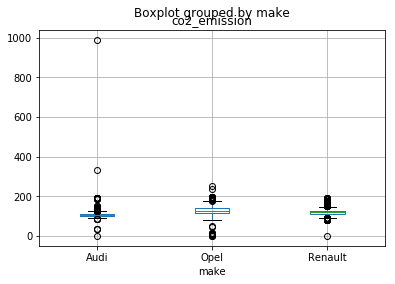

In [152]:
# df_new.boxplot("co2_emission", by="make")

In [153]:
# df_new.co2_emission.describe()

count    13483.000000
mean       117.953942
std         20.245589
min          0.000000
25%        104.000000
50%        116.000000
75%        129.000000
max        990.000000
Name: co2_emission, dtype: float64

In [154]:
# # Calculate IQR for the whole column
# Q1 = df_new.co2_emission.quantile(0.25)
# Q3 = df_new.co2_emission.quantile(0.75)
# IQR = Q3 - Q1
# print(IQR)

25.0


In [155]:
# # Calculate the number of outliers
# sum( (df_new.co2_emission < (Q1 - 1.5 * IQR)) | (df_new.co2_emission > (Q3 + 1.5 * IQR)) )

248

There seems to be outliers, which are probably wrong entries. An Opel, for example, has a CO2 emission which is almost 800 g/km. That is impossible and such a level of emission is prohibited by the laws. (https://ec.europa.eu/clima/policies/transport/vehicles/cars_en)

We need to take care of outliers and missing values in this column. A possible solution is to take the average of each car **model**, and assign the mean to the missing/wrong entries for that model of car.

----

### Consumption

In [156]:
# df.consumption.sample(10)

10129    [[6.3 l/100 km (comb)], [7.8 l/100 km (city)],...
5679     [[5.5 l/100 km (comb)], [6.9 l/100 km (city)],...
9572     [[5.2 l/100 km (comb)], [6.9 l/100 km (city)],...
1734     [[4.4 l/100 km (comb)], [5.2 l/100 km (city)],...
9797     [[5.3 l/100 km (comb)], [6.6 l/100 km (city)],...
10661    [[4.9 l/100 km (comb)], [6.3 l/100 km (city)],...
7872     [[6.1 l/100 km (comb)], [7.5 l/100 km (city)],...
2724     [[], [3.4 l/100 km (city)], [3.8 l/100 km (cou...
15614    [[5.1 l/100 km (comb)], [5.7 l/100 km (city)],...
10806    [[5.5 l/100 km (comb)], [7.7 l/100 km (city)],...
Name: consumption, dtype: object

In [157]:
# Percentage of NaNs
# autos.consumption.isnull().mean()

0.11973113889063383

In [ ]:
NaN_to_list(df, "consumption")

In [ ]:
# Check to see how many elements each list have
df.consumption.apply(lambda x: len(x)).value_counts()

I expected to see at most 3 elements in a list. Interestingly, however, there are many rows with 7 and 5 elements. The reason is that, lists in those row consist of `\n`s along with consumption values (see below).

In [ ]:
df.consumption[df.consumption.apply(lambda x: (len(x)== 7) | (len(x)== 5))].head()

In [201]:
df.consumption[0]

[['3.8 l/100 km (comb)'], ['4.3 l/100 km (city)'], ['3.5 l/100 km (country)']]

In [290]:
df.consumption.str[0].head(10)

0    [3.8 l/100 km (comb)]
1    [5.6 l/100 km (comb)]
2    [3.8 l/100 km (comb)]
3    [3.8 l/100 km (comb)]
4    [4.1 l/100 km (comb)]
5    [3.5 l/100 km (comb)]
6    [3.7 l/100 km (comb)]
7    [3.7 l/100 km (comb)]
8    [3.7 l/100 km (comb)]
9                      NaN
Name: consumption, dtype: object

In [303]:
df.consumption.str[0].str[0].head()

0    3.8 l/100 km (comb)
1    5.6 l/100 km (comb)
2    3.8 l/100 km (comb)
3    3.8 l/100 km (comb)
4    4.1 l/100 km (comb)
Name: consumption, dtype: object

In [321]:
"comb" in str(df.consumption[0][0])

True

In [323]:
# Create a boolean for checking "comb"
comb_bool = df.consumption.str[0].str[0].str.contains("comb", na=False)

In [330]:
# Create a new column for 'consumption_comb'
df_new['consumption_comb'] = df[comb_bool].consumption.str[0].str[0].str.extract(r'(\d.\d|\d)')

### Cylinders

In [202]:
# df.cylinders.sample(10)

988      [\n3\n]
7607     [\n4\n]
6662     [\n4\n]
13266        NaN
2            NaN
7967         NaN
7539     [\n4\n]
4311     [\n4\n]
3564         NaN
8815     [\n4\n]
Name: cylinders, dtype: object

In [203]:
# Percentage of missing values
# df.cylinders.isnull().mean()

0.3568063320560337

In [204]:
# Clean 'cylinders' column
df_new['cylinders'] = df.cylinders.str[0].str.extract(r'(\d+)')
# Change the 'cylinders' columns data type to numeric
df_new['cylinders'] = pd.to_numeric(df_new['cylinders'])
# df_new.cylinders.sample(10)

5853     4.0
7975     NaN
9703     NaN
13069    NaN
13004    4.0
15485    4.0
4800     4.0
1847     3.0
7388     4.0
15840    NaN
Name: cylinders, dtype: float64

In [205]:
# df_new.cylinders.value_counts()

4.0    8105
3.0    2104
5.0      22
6.0       3
2.0       2
8.0       2
1.0       1
Name: cylinders, dtype: int64

The values appear to be normal. We need to take care of missing values in this column though. A possible solution is to use some necessary columns such as  `model` to fit a *regression* model, and to predict those values.

### Displacement

In [206]:
# df.displacement.sample(10)

12701               NaN
12643    [\n1,600 cc\n]
786      [\n1,422 cc\n]
14994    [\n1,598 cc\n]
5593       [\n999 cc\n]
3535     [\n1,197 cc\n]
12088    [\n1,490 cc\n]
8504     [\n1,398 cc\n]
4663     [\n1,598 cc\n]
14693      [\n898 cc\n]
Name: displacement, dtype: object

In [207]:
# df.displacement.isnull().mean()

0.0311577360386959

In [211]:
# df.displacement.str[0].str.replace(",","").str.extract(r'(\d+)').head()

,0
0,1422
1,1798
2,1598
3,1422
4,1422


In [212]:
# Extract discplacement values (and remove commas)
df_new['displacement'] = df.displacement.str[0].str.replace(",","").str.extract(r'(\d+)')

# # Change the type
# df_new['displacement'] = pd.to_numeric(df_new['displacement'])

# df_new['displacement'].sample(10)

13674       NaN
3973     1598.0
4170     1968.0
892       999.0
4360     1598.0
9892     1398.0
9426     1398.0
15722    1798.0
1835     1422.0
2360     1498.0
Name: displacement, dtype: float64

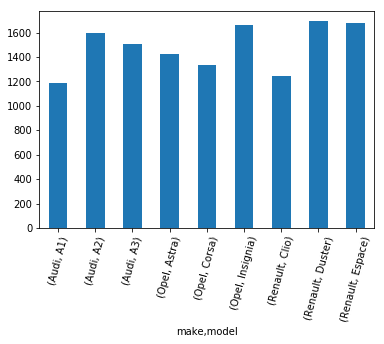

In [213]:
# df_new.groupby(["make","model"]).displacement.mean().plot.bar(rot=75)

In [214]:
# df_new.displacement.describe()

count    15423.000000
mean      1423.540881
std        333.530658
min          1.000000
25%       1229.000000
50%       1461.000000
75%       1598.000000
max      16000.000000
Name: displacement, dtype: float64

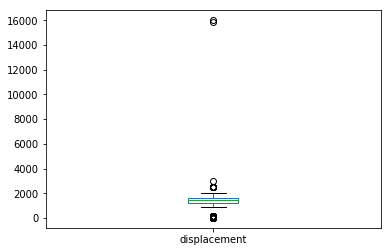

In [215]:
# df_new.displacement.plot.box()

When we look at the outliers, they seem to be problematic (See below). We may need to threat them as missing and perform imputation.

In [216]:
# df_new[df_new.displacement > 3500]

,safety_security,co2_emission,consumption,country_version,cylinders,displacement,make,model,model_code,next_inspection,non_smoking_vehicle,body_type,description,hp,kw,km,offer_number,ABS,Adaptive Cruise Control,Adaptive headlights,Alarm system,Blind spot monitor,Central door lock,Central door lock with remote control,Daytime running lights,Driver drowsiness detection,Driver-side airbag,Electronic stability control,Emergency brake assistant,Emergency system,Fog lights,Head airbag,Immobilizer,Isofix,LED Daytime Running Lights,LED Headlights,Lane departure warning system,Night view assist,Passenger-side airbag,Power steering,Rear airbag,Side airbag,Tire pressure monitoring system,Traction control,Traffic sign recognition,Xenon headlights
7169,"[ABS, Central door lock, Daytime running light...",119.0,"[[4.5 l/100 km (comb)], [5.7 l/100 km (city)],...",NaN,4.0,15898.0,Opel,Astra,NaN,"[\n06/2021\n, \n119 g CO2/km (comb)\n]","[\n, \n]",Station wagon,"[\n, Getriebe, Automatikgetriebe, 6-Gang, Lich...",100 kW,None,"22,327 km",[\n8070242\n],1,0,0,0,0,1,0,1,0,1,1,1,0,1,0,1,1,1,0,1,0,1,1,0,1,1,1,1,0
10932,"[ABS, Central door lock, Daytime running light...",NaN,NaN,NaN,NaN,16000.0,Opel,Insignia,NaN,NaN,"[\n, \n]",Station wagon,[\nIch verkaufe meine gut gefleckt Opel Insign...,88 kW,None,"76,500 km",NaN,1,0,0,0,0,1,0,1,1,1,1,0,1,1,0,0,0,1,0,0,0,1,1,1,1,1,1,0,0


### Next Inspection

In [217]:
# df.next_inspection.sample(10)

14653                                       NaN
12742                                       NaN
812       [\n05/2018\n, \n97 g CO2/km (comb)\n]
3534     [\n01/2021\n, \n0 kWh/100 km (comb)\n]
2377                                        NaN
5787                                        NaN
12468                                       NaN
4294                                        NaN
3541                                        NaN
10722    [\n05/2021\n, \n129 g CO2/km (comb)\n]
Name: next_inspection, dtype: object

The rows are mixed with values from other columns: `CO2 Emission`, `Consumption` etc.  

In [260]:
# Extract 'next_inspection' values
df_new.next_inspection = df.next_inspection.str[0].str.strip("\n")

In [261]:
# df_new.next_inspection.head()

0    06/2021
1        NaN
2        NaN
3        NaN
4        NaN
Name: next_inspection, dtype: object

In [266]:
# Create a boolean column from `next_inspection`
df_new['next_inspection_bool'] = df_new.next_inspection.notnull()

In [219]:
# Percentage of missing values
# df_new.next_inspection.isnull().mean()

0.7779383127080847

There are so many missing values. Although this column is important, we may need to drop it. Yet, there might be information in other columns, especially in `description` column, regarding the _Next Inspection_.

### Non-smoking Vehicle

In [226]:
# df['non_smoking_vehicle'].sample(20)

3329                  [\n, \n, \nEuro 6\n]
11261                 [\n, \n, \nEuro 6\n]
11021                                  NaN
9124                                   NaN
15665                                  NaN
13409                             [\n, \n]
10056                             [\n, \n]
10223                             [\n, \n]
133                                    NaN
4957                                   NaN
8783                                   NaN
10792              [\n, \n, \n4 (Green)\n]
15083    [\n, \n, \n153 g CO2/km (comb)\n]
5030                                   NaN
11719                             [\n, \n]
14177                                  NaN
15786                                  NaN
8886                              [\n, \n]
823                   [\n, \n, \nEuro 6\n]
8638                              [\n, \n]
Name: non_smoking_vehicle, dtype: object

In [235]:
# autos.iloc[10792].url

'https://www.autoscout24.com//offers/opel-insignia-a-1-6-cdti-aut-sports-navi-applecarpla-diesel-grey-87baa4ac-16e9-4590-b79c-8cd37b798afb'

In [222]:
# df['non_smoking_vehicle'].isnull().mean()

0.5491550976820152

In [ ]:
# Drop 'non-smoking_vehicle' column
df_new.drop("non_smoking_vehicle", axis=1, inplace=True)

The information in this column is wrognly coded, and more than half is missing. We may drop this column. (" " means yes(True))

### Body Type

In [237]:
# df.body_type.head()

0    Sedans
1    Sedans
2    Sedans
3    Sedans
4    Sedans
Name: body_type, dtype: object

In [238]:
# df.body_type.value_counts()

Sedans           7903
Station wagon    3553
Compact          3153
Van               783
Other             290
Transporter        88
Off-Road           56
Coupe              25
Convertible         8
Name: body_type, dtype: int64

### Hp

In [239]:
# df.hp.head()

0     66 kW
1    141 kW
2     85 kW
3     66 kW
4     66 kW
Name: hp, dtype: object

In [245]:
# Extract hp from 'hp' column
df_new['hp'] = df.hp.str.extract(r'(\d+)')

### Kw

In [248]:
# df.kw.isnull().mean()

1.0

In [249]:
# Drop 'kw' column
df_new.drop('kw', axis=1, inplace=True)

### Km

In [250]:
# df.km.head()

0    56,013 km
1    80,000 km
2    83,450 km
3    73,000 km
4    16,200 km
Name: km, dtype: object

In [255]:
# Clean 'km' column
df_new['km'] = df.km.str.replace(",", "").str.extract(r'(\d+)')

### Offer Number

In [268]:
df.offer_number.head()

0    [\nLR-062483\n]
1                NaN
2     [\nAM-95365\n]
3                NaN
4        [\nC1626\n]
Name: offer_number, dtype: object

In [287]:
# Clean "offer_number' column
df_new['offer_number'] = df.offer_number.str[0].str.replace("\n","")

0    LR-062483
1          NaN
2     AM-95365
3          NaN
4        C1626
Name: offer_number, dtype: object

### Description

In [256]:
df.description.head()

0    [\n, Sicherheit:,  , Deaktivierung für Beifahr...
1    [\nLangstreckenfahrzeug daher die hohe Kilomet...
2    [\n, Fahrzeug-Nummer: AM-95365,  , Ehem. UPE 2...
3    [\nAudi A1: , - 1e eigenaar , - Perfecte staat...
4    [\n, Technik & Sicherheit:, Xenon plus, Klimaa...
Name: description, dtype: object

----

### Price

In [88]:
autos.price.head()

0    \n€ 11,990.-\n
1    \n€ 12,200.-\n
2    \n€ 12,250.-\n
3    \n€ 12,200.-\n
4    \n€ 12,200.-\n
Name: price, dtype: object

In [89]:
autos.price.isnull().sum()

0

In [90]:
df_new['price'] = autos.price.apply(lambda x: x.strip("\n").strip("€ ").strip(".-").replace(",",""))
df_new.price.head()

0    11990
1    12200
2    12250
3    12200
4    12200
Name: price, dtype: object

In [91]:
df_new['price'] = pd.to_numeric(df_new.price)

### Registration

In [92]:
autos.registration.head()

0     [03/2015, 1 previous owner]
1    [11/2014, 2 previous owners]
2     [03/2015, 1 previous owner]
3    [11/2014, 2 previous owners]
4    [11/2014, 2 previous owners]
Name: registration, dtype: object

In [93]:
# Extract years (first item) from the list
reg = autos.registration.apply(lambda x: x[0])

In [94]:
reg.head()

0    03/2015
1    11/2014
2    03/2015
3    11/2014
4    11/2014
Name: registration, dtype: object

In [95]:
# Count the number of missing values
(reg.str.count("\d") == 0).sum()

# Count the number of missing values (alternative way)
# (reg.str.count("\d") == 0).sum()

90

In [96]:
# Count the number of missing values
reg.str.contains("-").sum()

90

In [97]:
reg_new = reg[~reg.str.contains("-")]

In [98]:
reg_new = pd.to_datetime(reg_new, format='%m/%Y')
reg_new.head()

0   2015-03-01
1   2014-11-01
2   2015-03-01
3   2014-11-01
4   2014-11-01
Name: registration, dtype: datetime64[ns]

In [99]:
reg_year = reg_new.apply(lambda x: x.year)

In [100]:
df_new['age'] = 2019 - reg_year

In [101]:
df_new.groupby("model").age.mean()

model
A4        4.076408
A5        3.952913
A6        3.978681
Adam      3.405063
Clio      3.734677
Corsa     3.353701
Duster    0.000000
Meriva    4.138408
Scenic    3.403760
Name: age, dtype: float64

> There seems to be no ad for an older Duster 

In [102]:
df_new.groupby("model").age.describe()

,count,mean,std,min,25%,50%,75%,max
model,,,,,,,,
A4,1492.0,4.076408,0.916094,0.0,4.0,4.0,5.0,5.0
A5,1253.0,3.952913,0.963479,0.0,3.0,4.0,5.0,5.0
A6,1501.0,3.978681,0.982282,0.0,3.0,4.0,5.0,5.0
Adam,869.0,3.405063,1.242219,0.0,2.0,3.0,4.0,5.0
Clio,1191.0,3.734677,1.177577,0.0,3.0,4.0,5.0,5.0
Corsa,1162.0,3.353701,1.431655,0.0,2.0,4.0,5.0,5.0
Duster,16.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Meriva,867.0,4.138408,0.908893,0.0,3.0,4.0,5.0,5.0
Scenic,1117.0,3.403760,1.420190,0.0,2.0,4.0,5.0,5.0


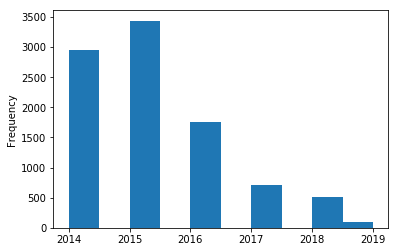

In [103]:
reg_year.plot.hist()
# df_new.age.plot.hist()

> There is no car older than 5 years. The data seems to be problematic.

In [104]:
df_new.groupby("model").age.max()

model
A4        5.0
A5        5.0
A6        5.0
Adam      5.0
Clio      5.0
Corsa     5.0
Duster    0.0
Meriva    5.0
Scenic    5.0
Name: age, dtype: float64

In [105]:
# Extract nr of "Previous owners"
autos.registration.apply(lambda x: x[1][0] if len(x) > 1 else np.nan).head()

0    1
1    2
2    1
3    2
4    2
Name: registration, dtype: object